# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
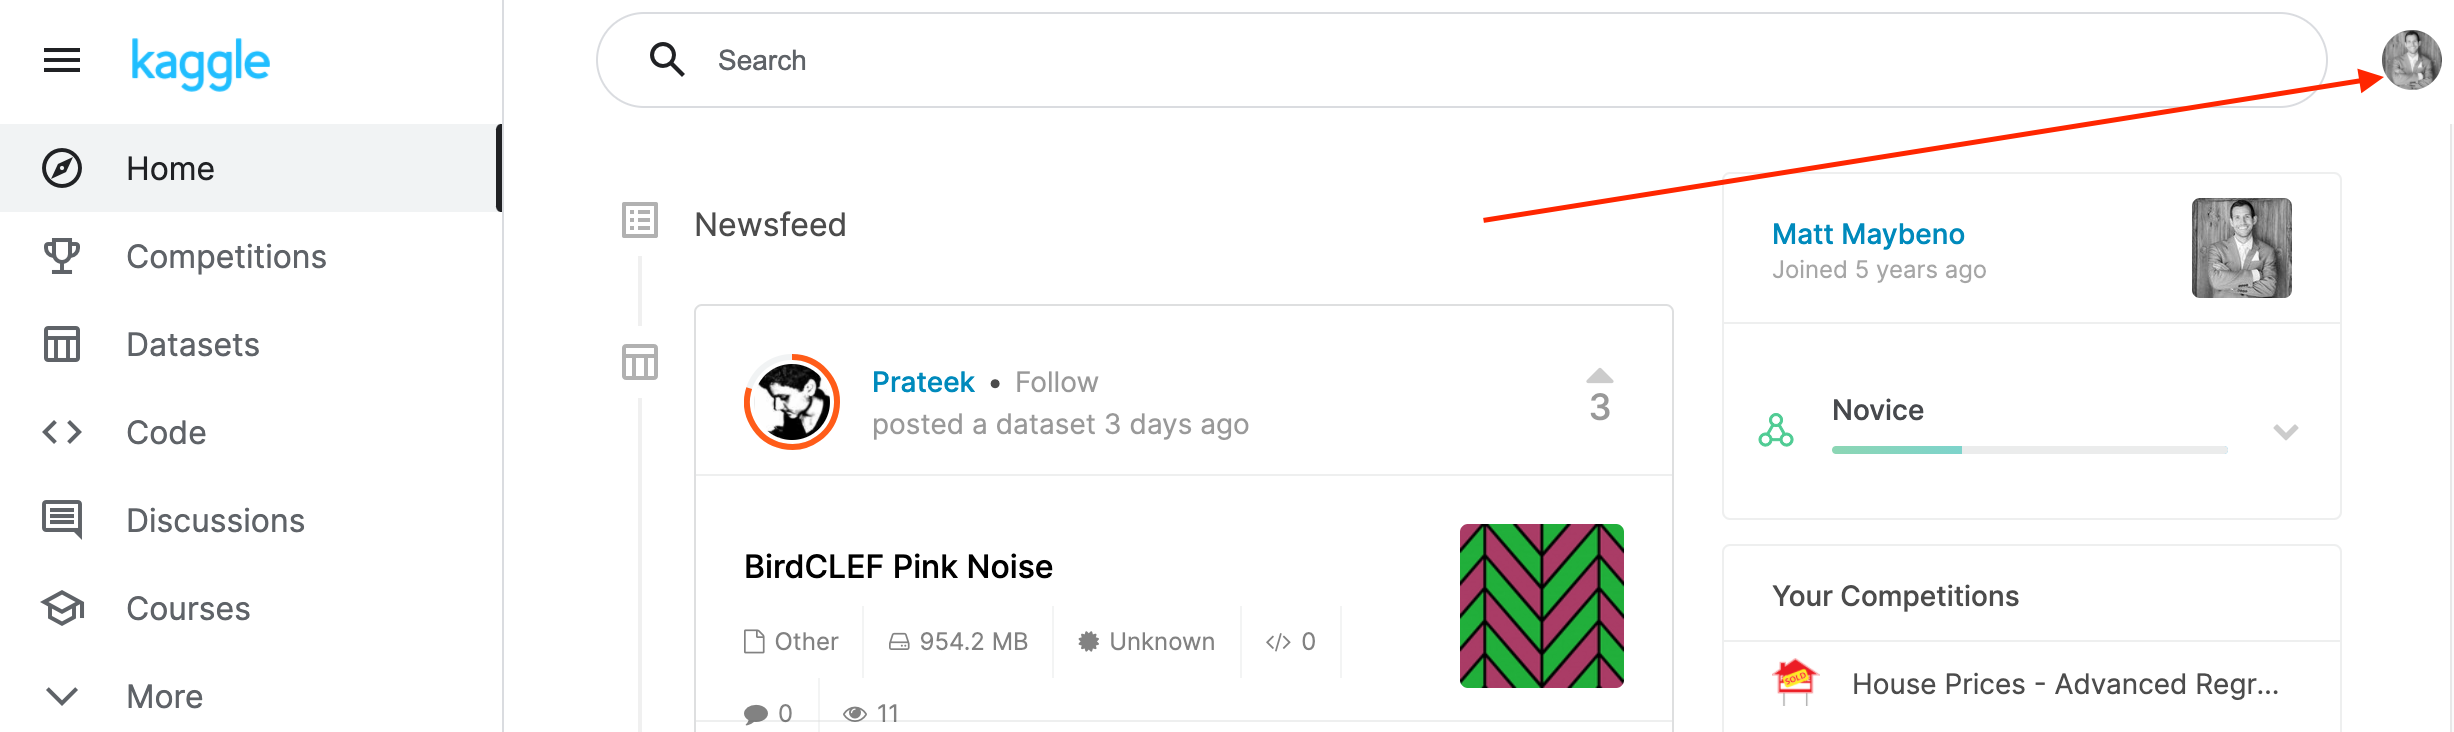
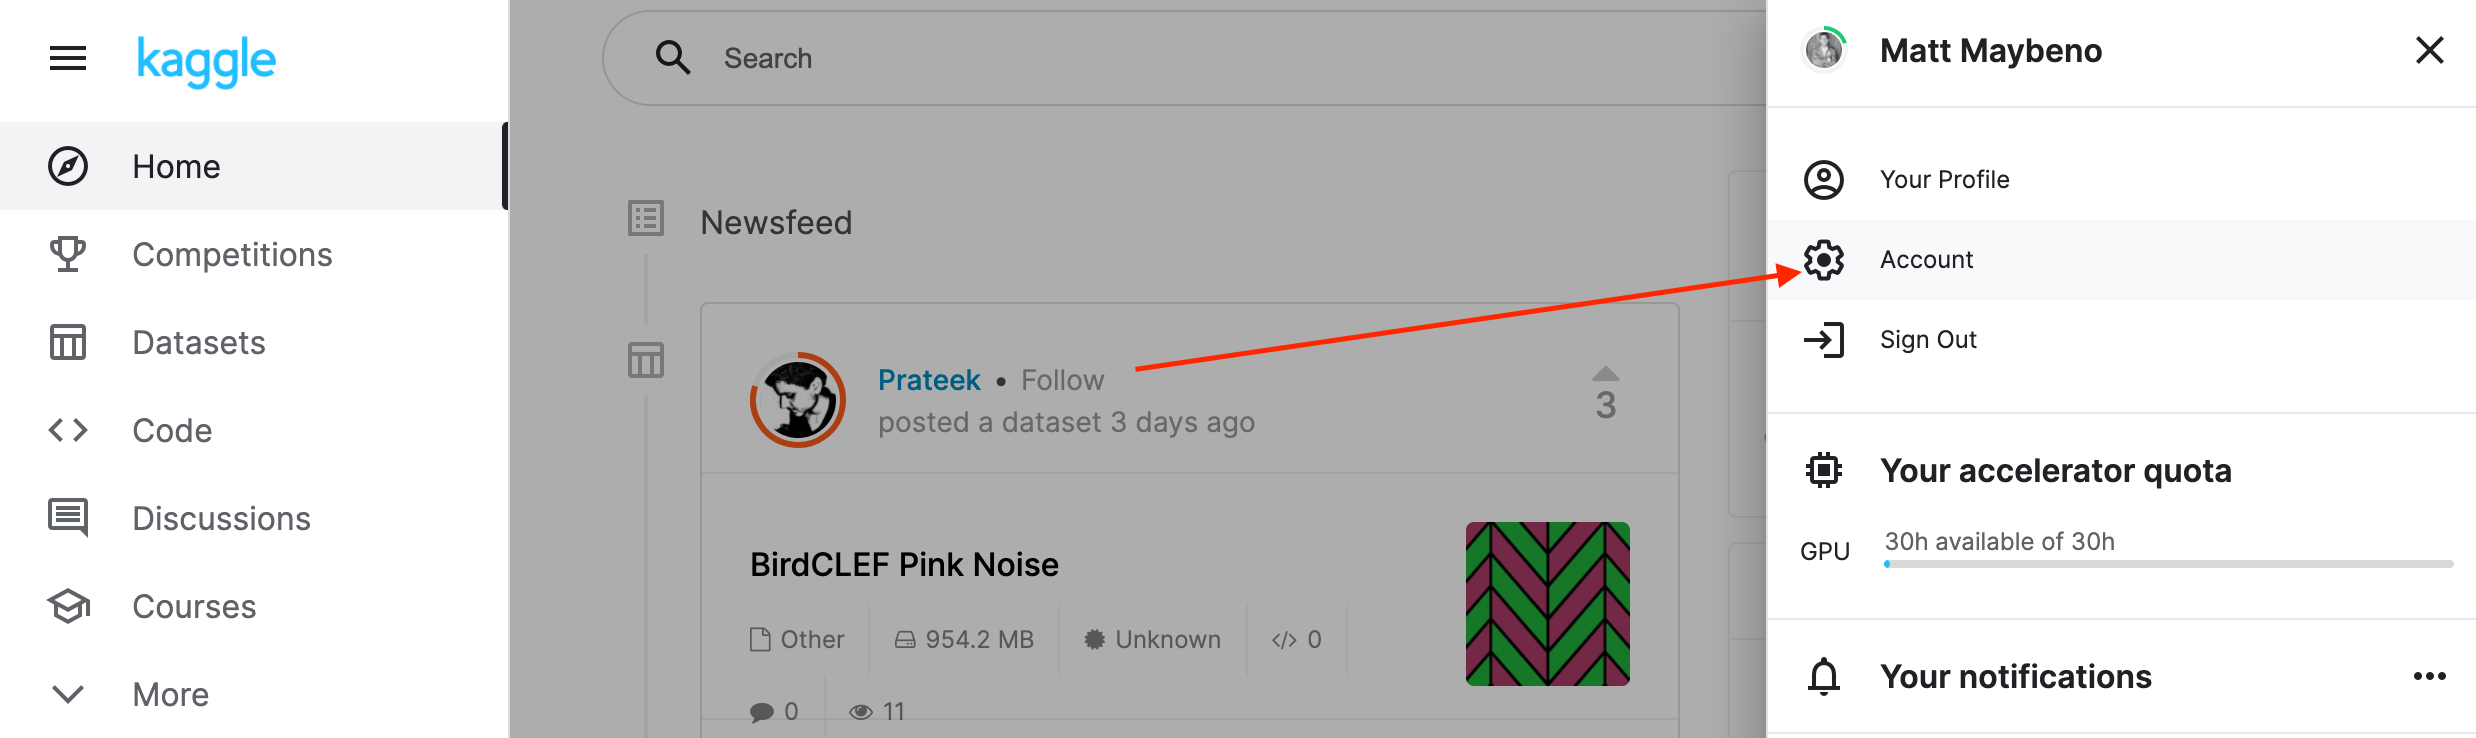
2. Scroll down to API and click Create New API Token.
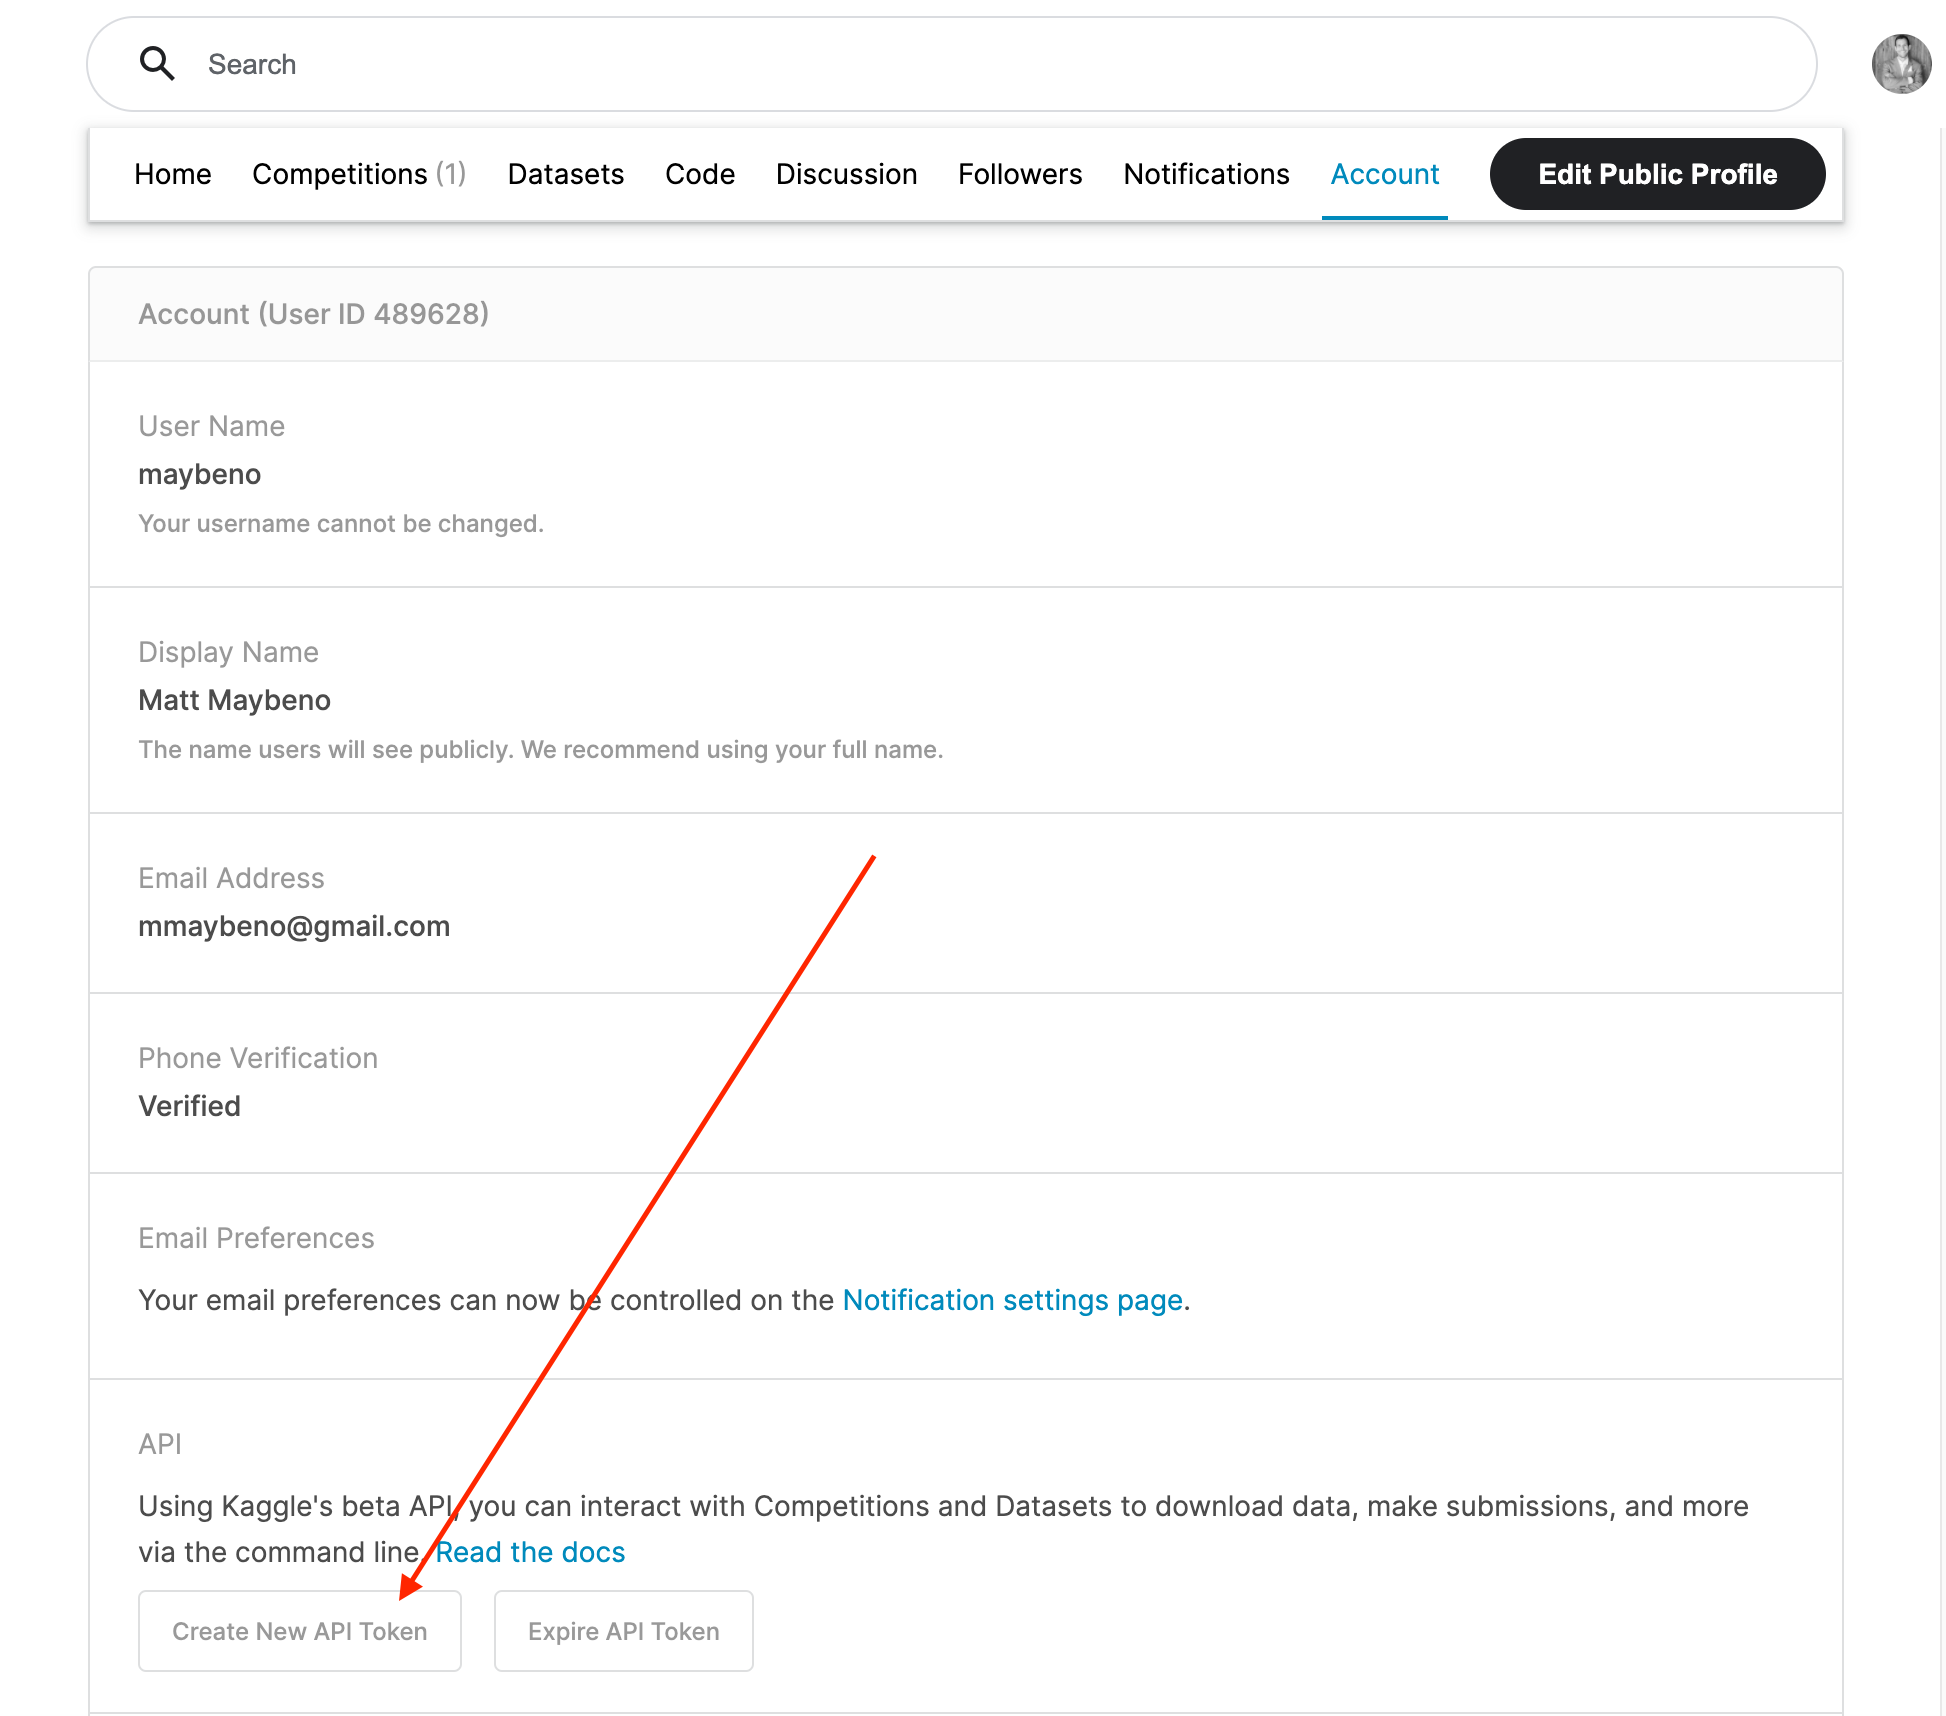
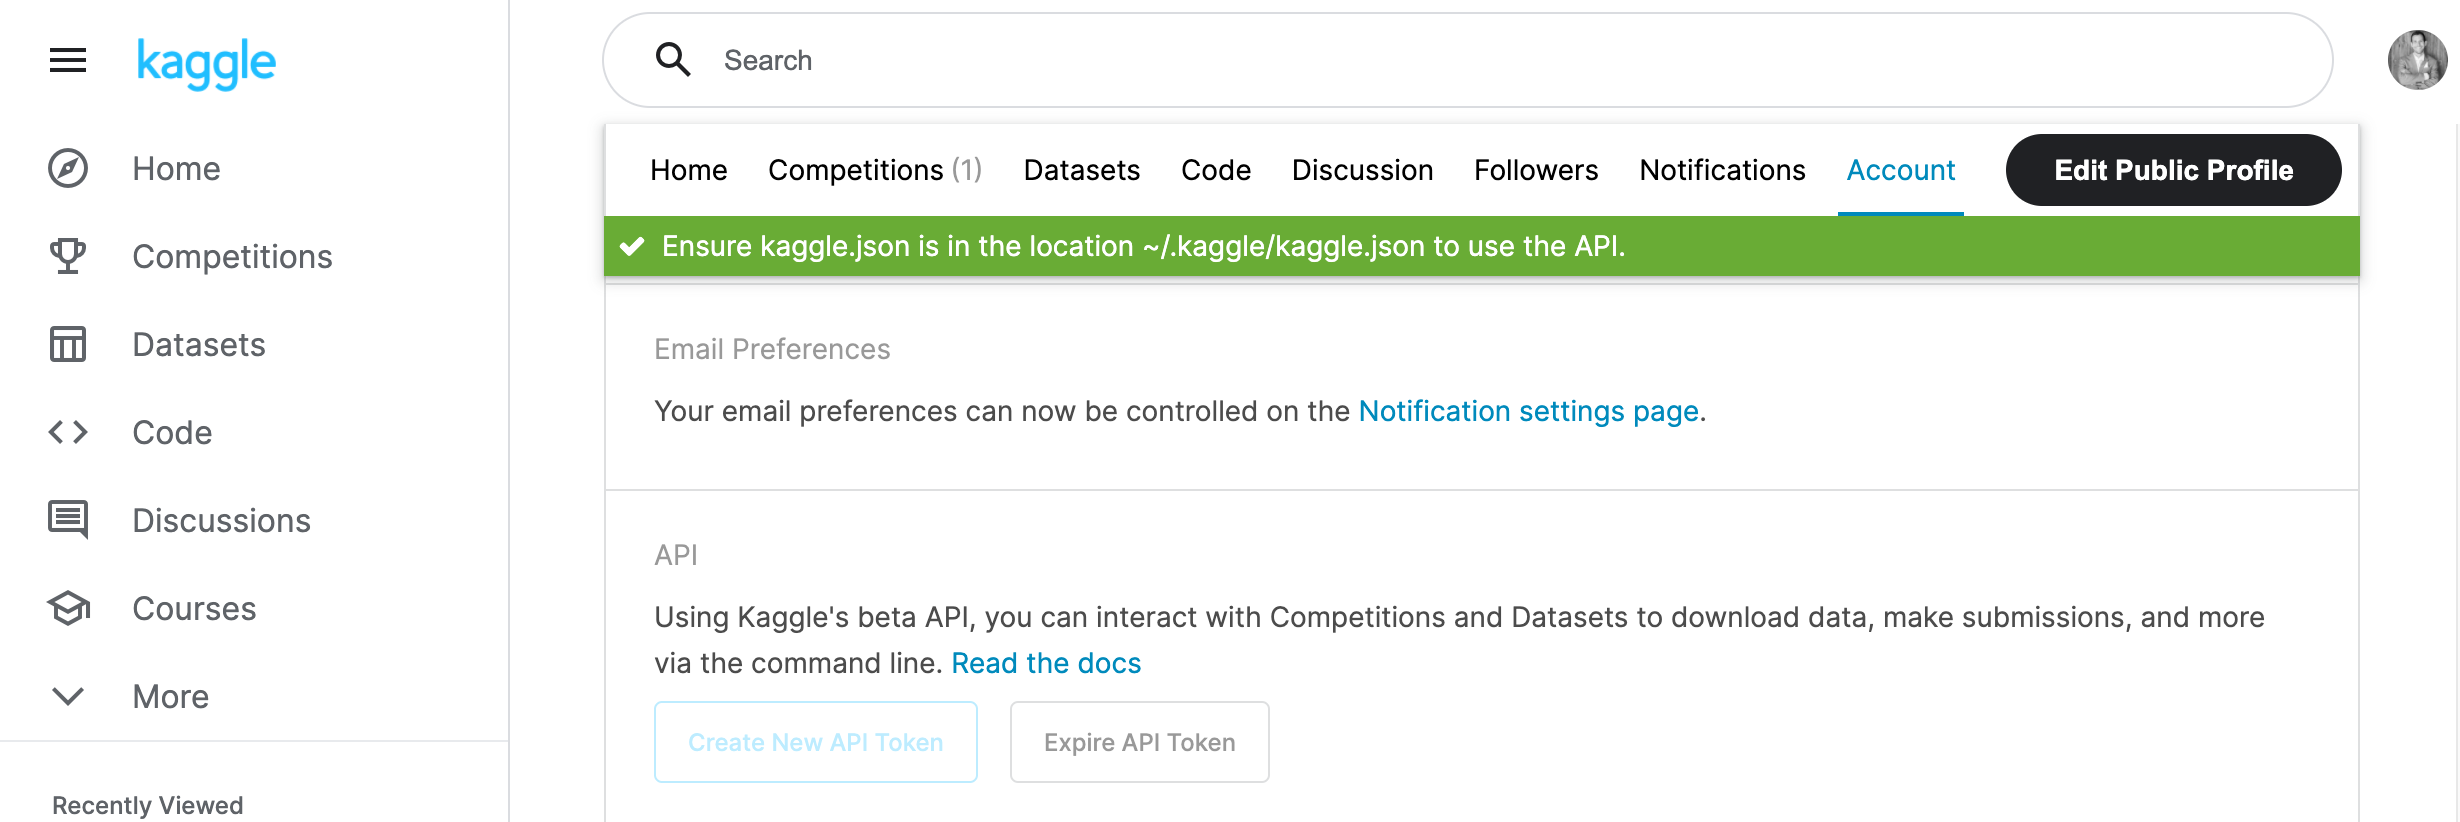
3. Open up `kaggle.json` and use the username and key.
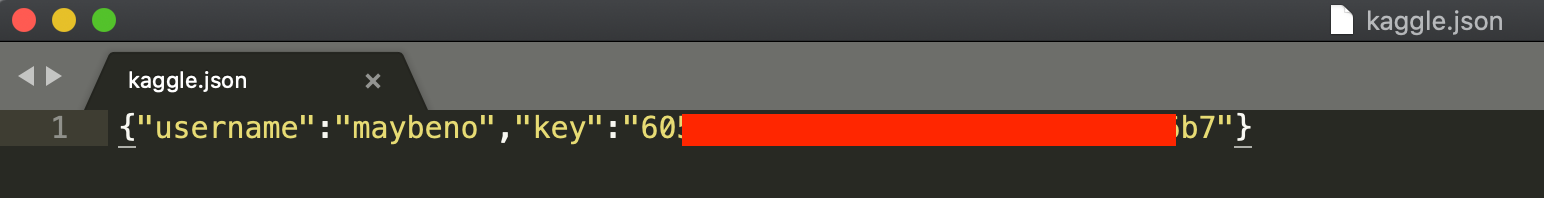

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [13]:
!pip install -U pip
!pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install -U autogluon --no-cache-dir
!pip install -U kaggle
# !pip install -U ray
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 242.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 344.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 376.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 276.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 295.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 233.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 113

### Setup Kaggle API Key

In [9]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "moathabuhamad"
kaggle_key = "d9a0733ae88c6dbe43a5ddf1def40566"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
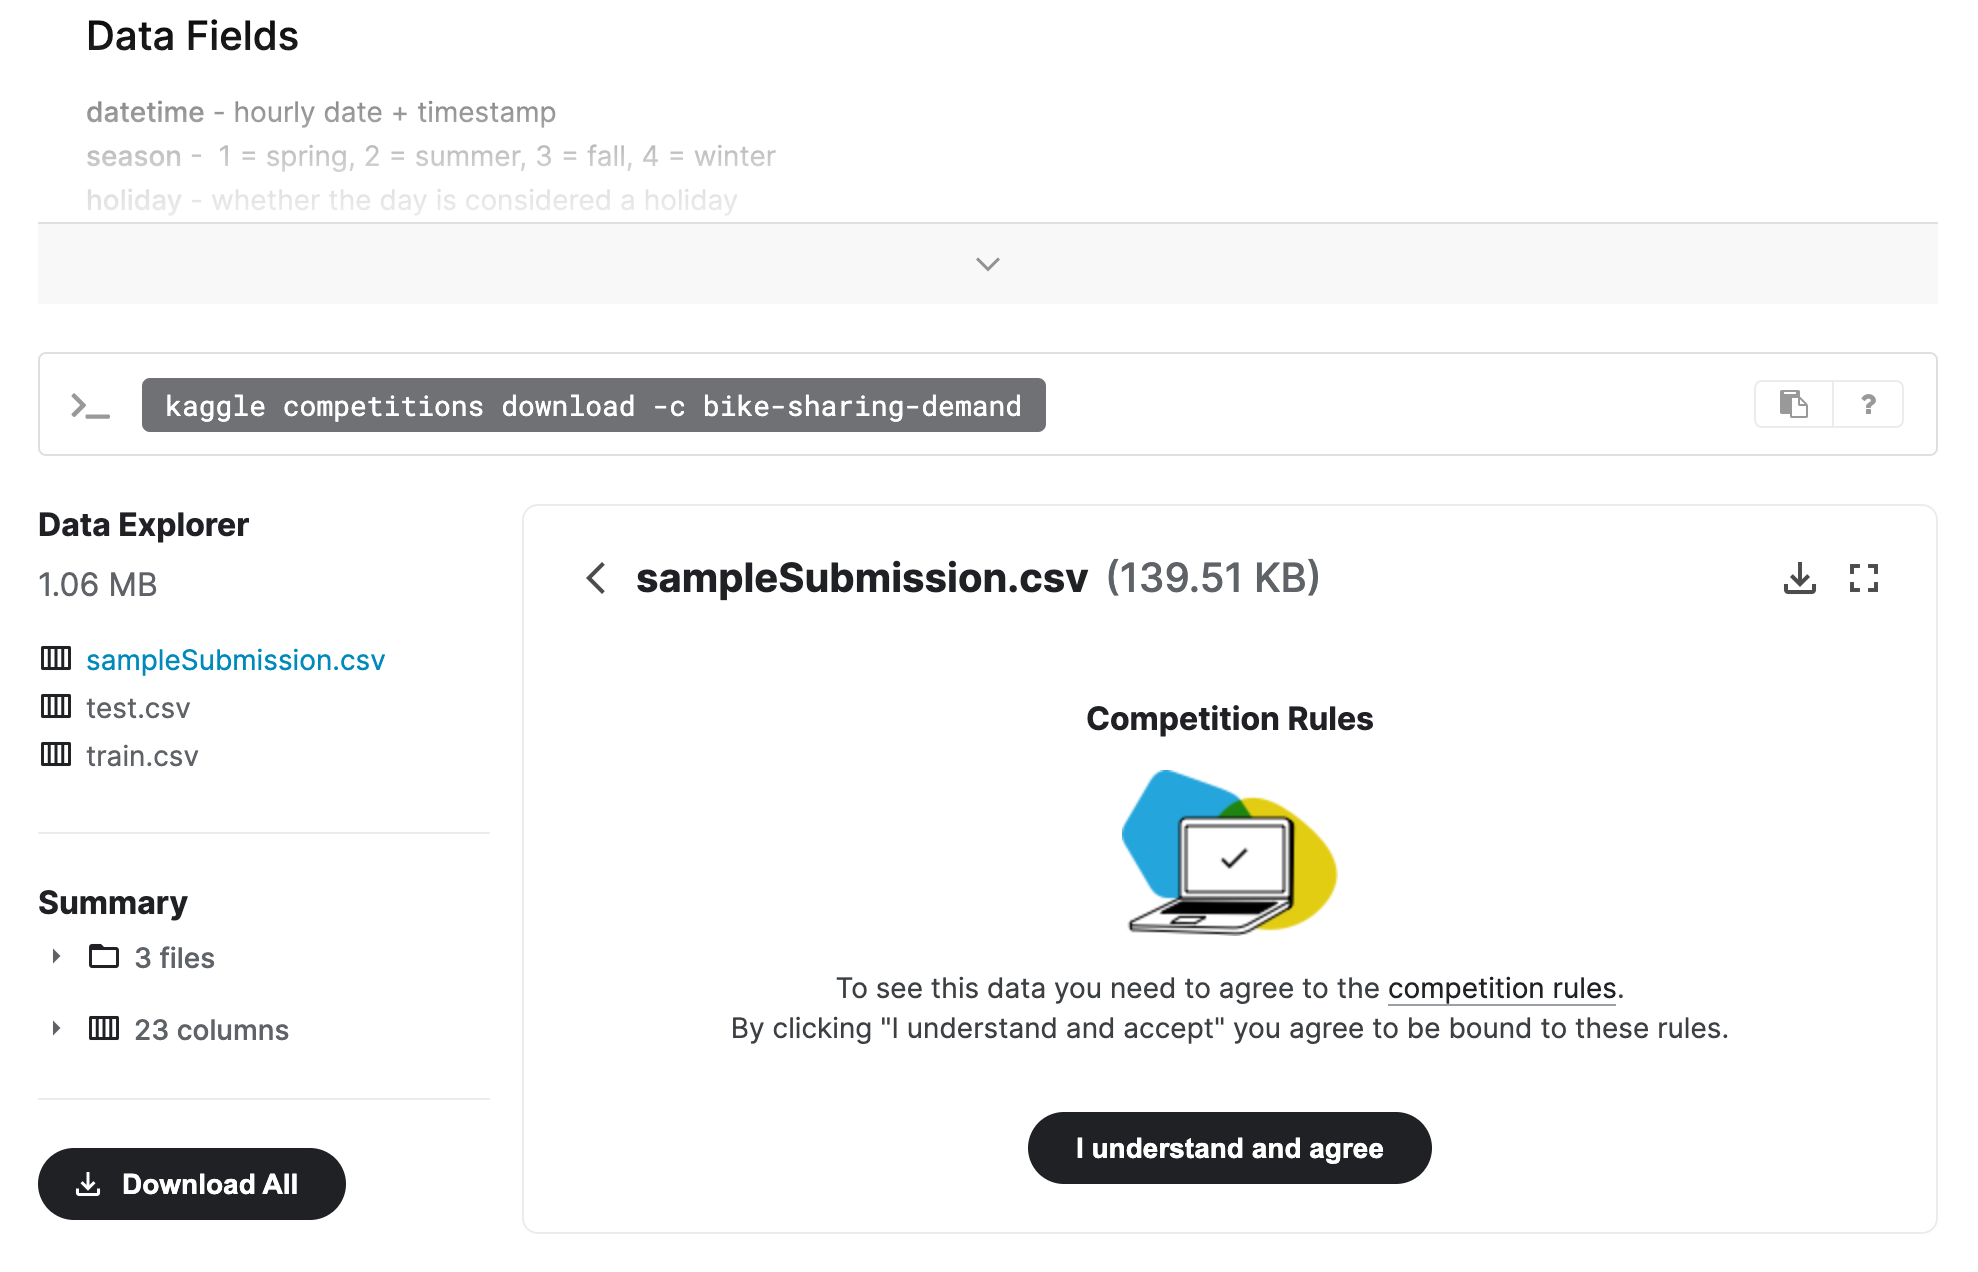

In [11]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [14]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [15]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [16]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [18]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [19]:
predictor = TabularPredictor(label='count',
                             problem_type='regression',
                             eval_metric='root_mean_squared_error',
                             learner_kwargs={'ignored_columns': ["casual", "registered"]}).fit(train_data = train,time_limit=600,
                                                                                               presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_081840"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_081840/ds_sub_fit/sub_fit_ho.
2024-05-05 08:18:41,128	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.

### Review AutoGluon's training run with ranking of models that did the best.

In [20]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.085967  root_mean_squared_error      19.344082  382.336502                0.000650           0.036406            3       True         12
1   RandomForestMSE_BAG_L2  -53.418611  root_mean_squared_error      14.240407  287.775892                0.822066          40.148603            2       True         11
2          LightGBM_BAG_L2  -54.933980  root_mean_squared_error      13.736477  279.223163                0.318136          31.595874            2       True         10
3        LightGBMXT_BAG_L2  -60.400788  root_mean_squared_error      18.203229  310.555620                4.784888          62.928330            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.061910    0.046056   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.83991119025956,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [21]:
predictions = predictor.predict(test)
predictions.head()

0    23.919024
1    42.902115
2    46.049805
3    49.173943
4    51.731064
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.589386
std        89.789017
min         3.137911
25%        20.012077
50%        64.134491
75%       167.658646
max       366.399170
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [24]:
# Set them to zero 
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [25]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 715kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-05-05 08:41:58  first raw submission  complete  1.79985      1.79985       


In [34]:
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.085967,root_mean_squared_error,19.344082,382.336502,0.000650,0.036406,3,True,12
1,RandomForestMSE_BAG_L2,-53.418611,root_mean_squared_error,14.240407,287.775892,0.822066,40.148603,2,True,11
2,LightGBM_BAG_L2,-54.933980,root_mean_squared_error,13.736477,279.223163,0.318136,31.595874,2,True,10
3,LightGBMXT_BAG_L2,-60.400788,root_mean_squared_error,18.203229,310.555620,4.784888,62.928330,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.061910,0.046056,0.061910,0.046056,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.062914,0.109691,0.001004,0.063635,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.048887,0.046669,0.048887,0.046669,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.542615,13.130184,0.542615,13.130184,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.910559,8.591356,0.910559,8.591356,1,True,7
9,CatBoost_BAG_L1,-130.839911,root_mean_squared_error,0.093220,131.420964,0.093220,131.420964,1,True,6


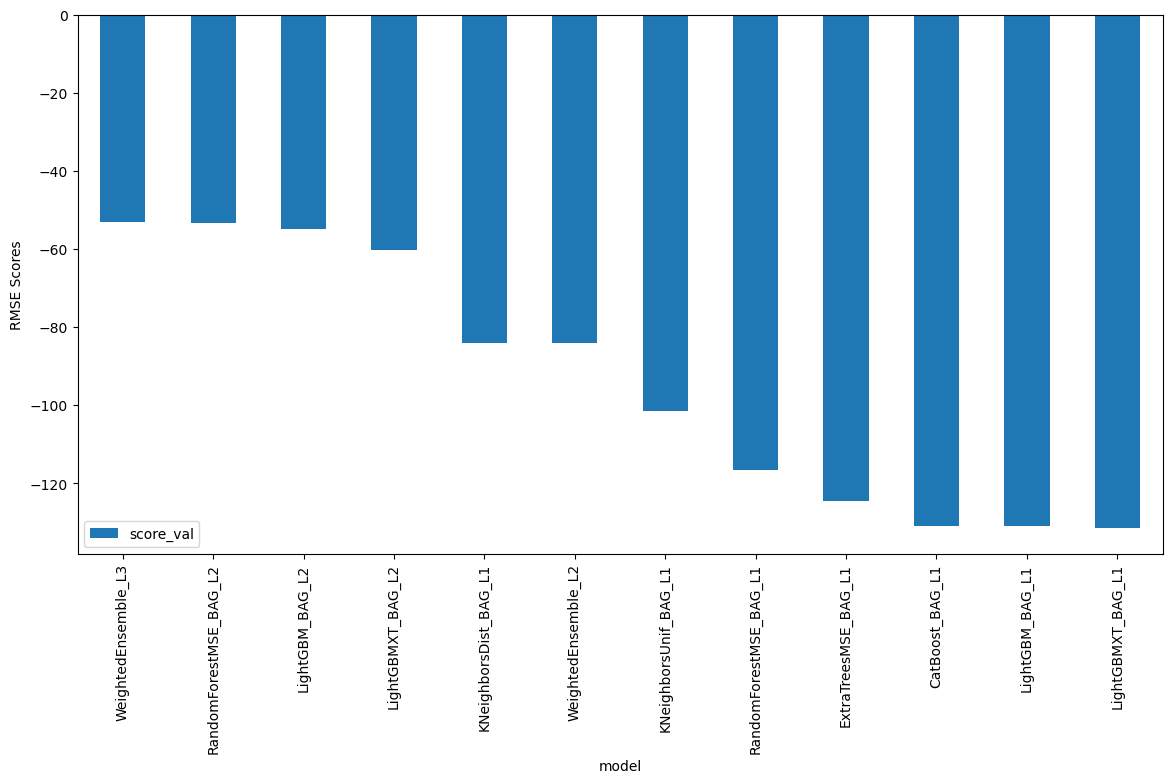

In [35]:
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

#### Initial score of `1.79985`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

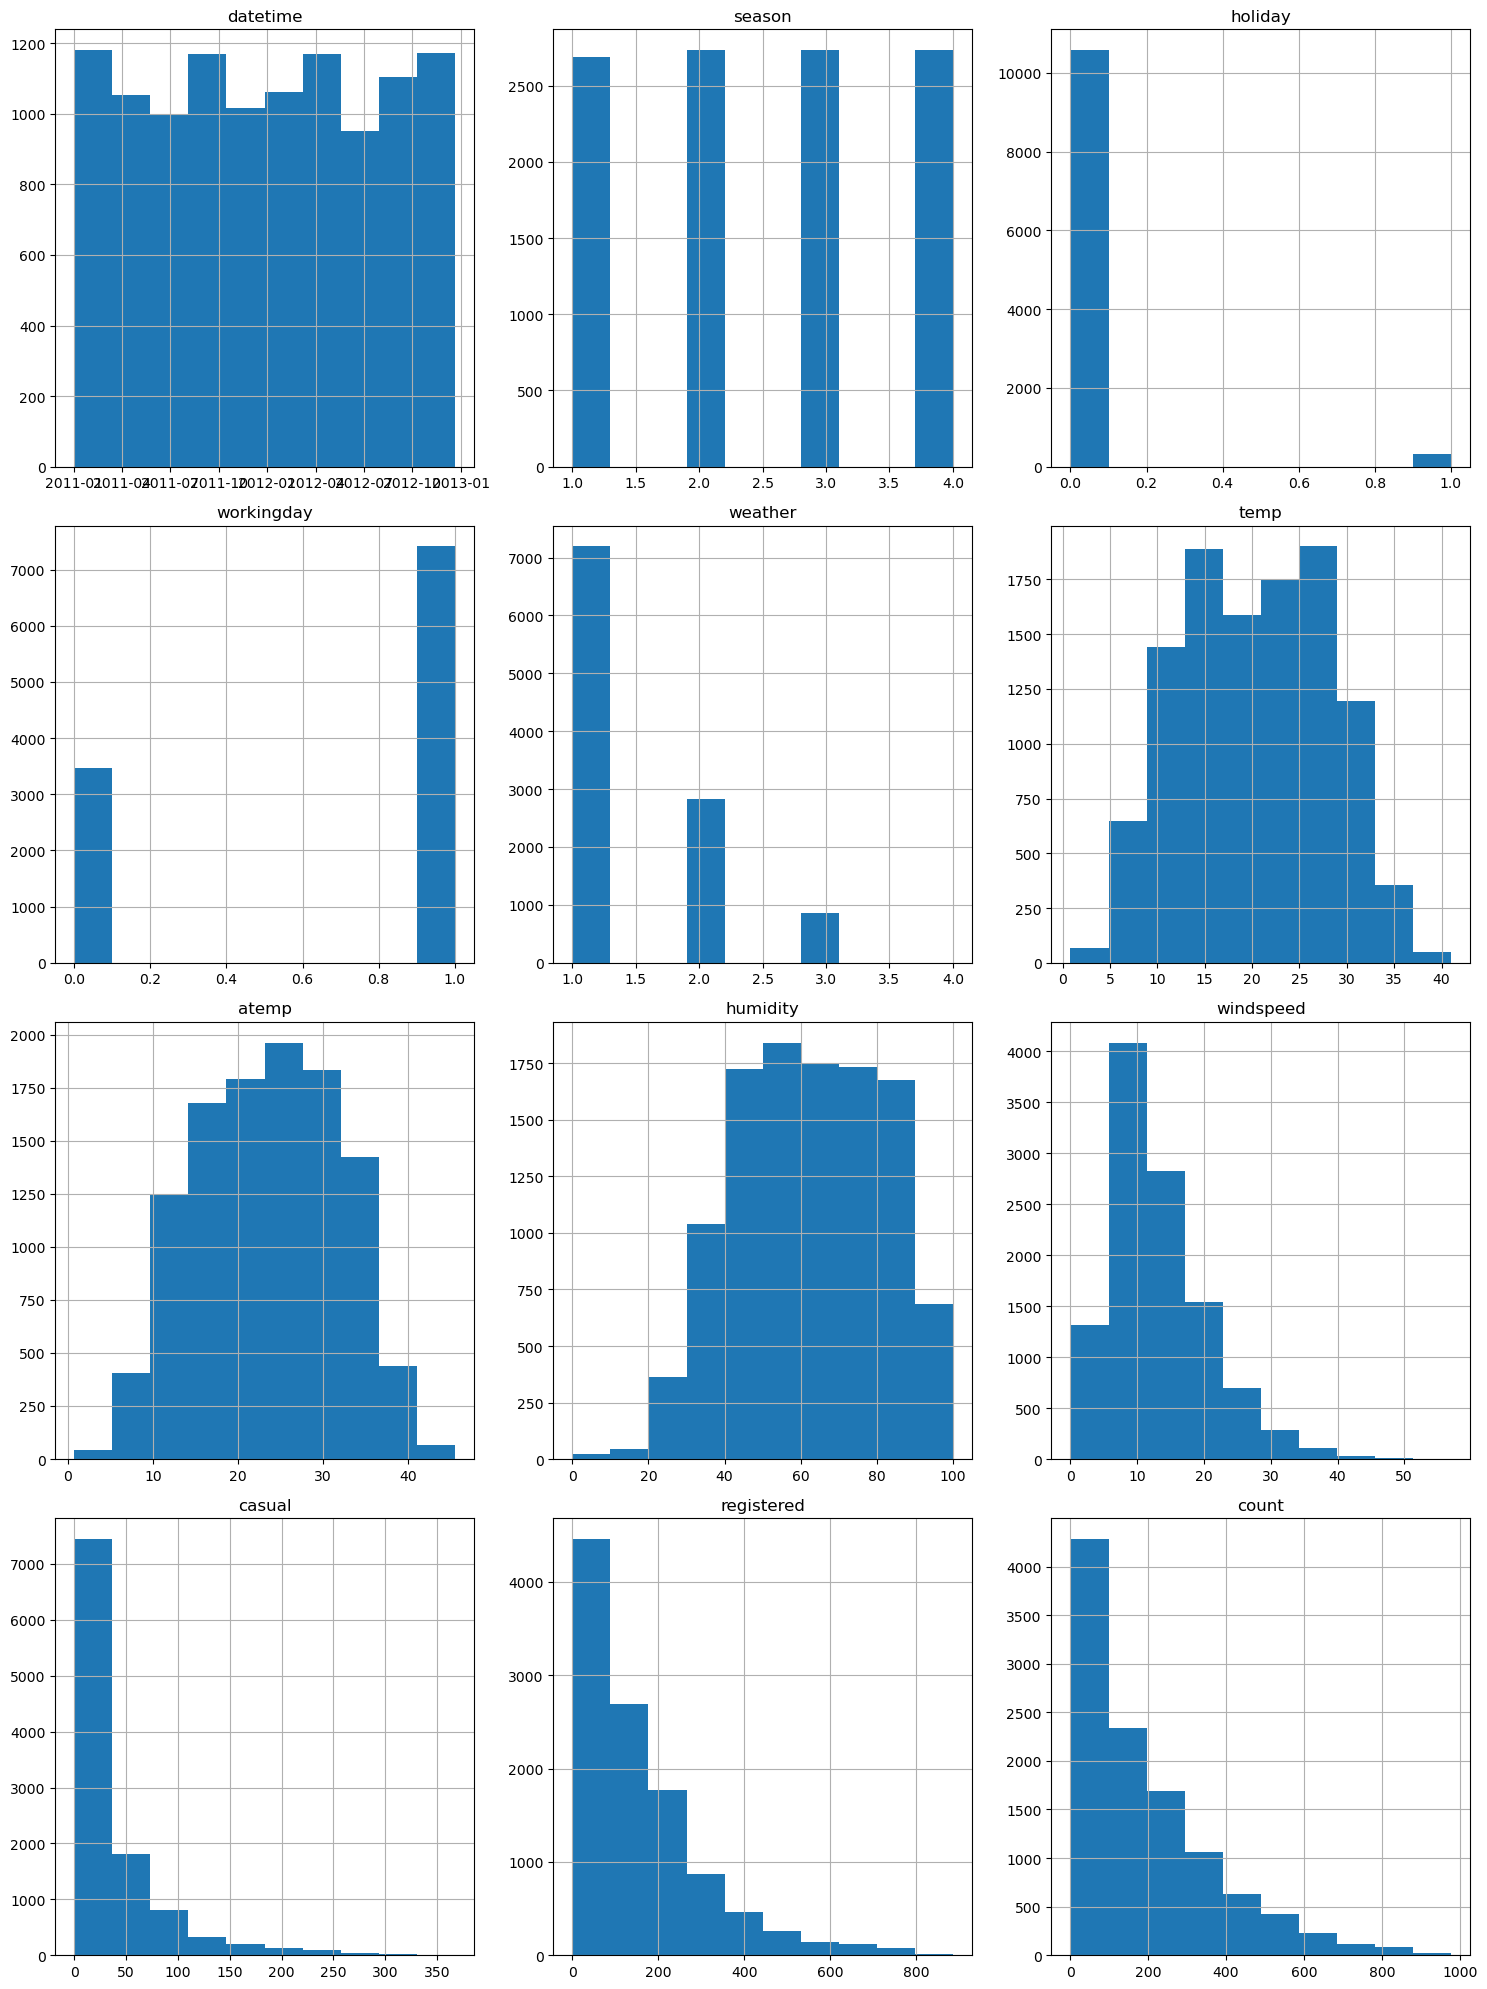

In [37]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(15,20))
plt.tight_layout()
plt.show()

<Figure size 1800x1800 with 0 Axes>

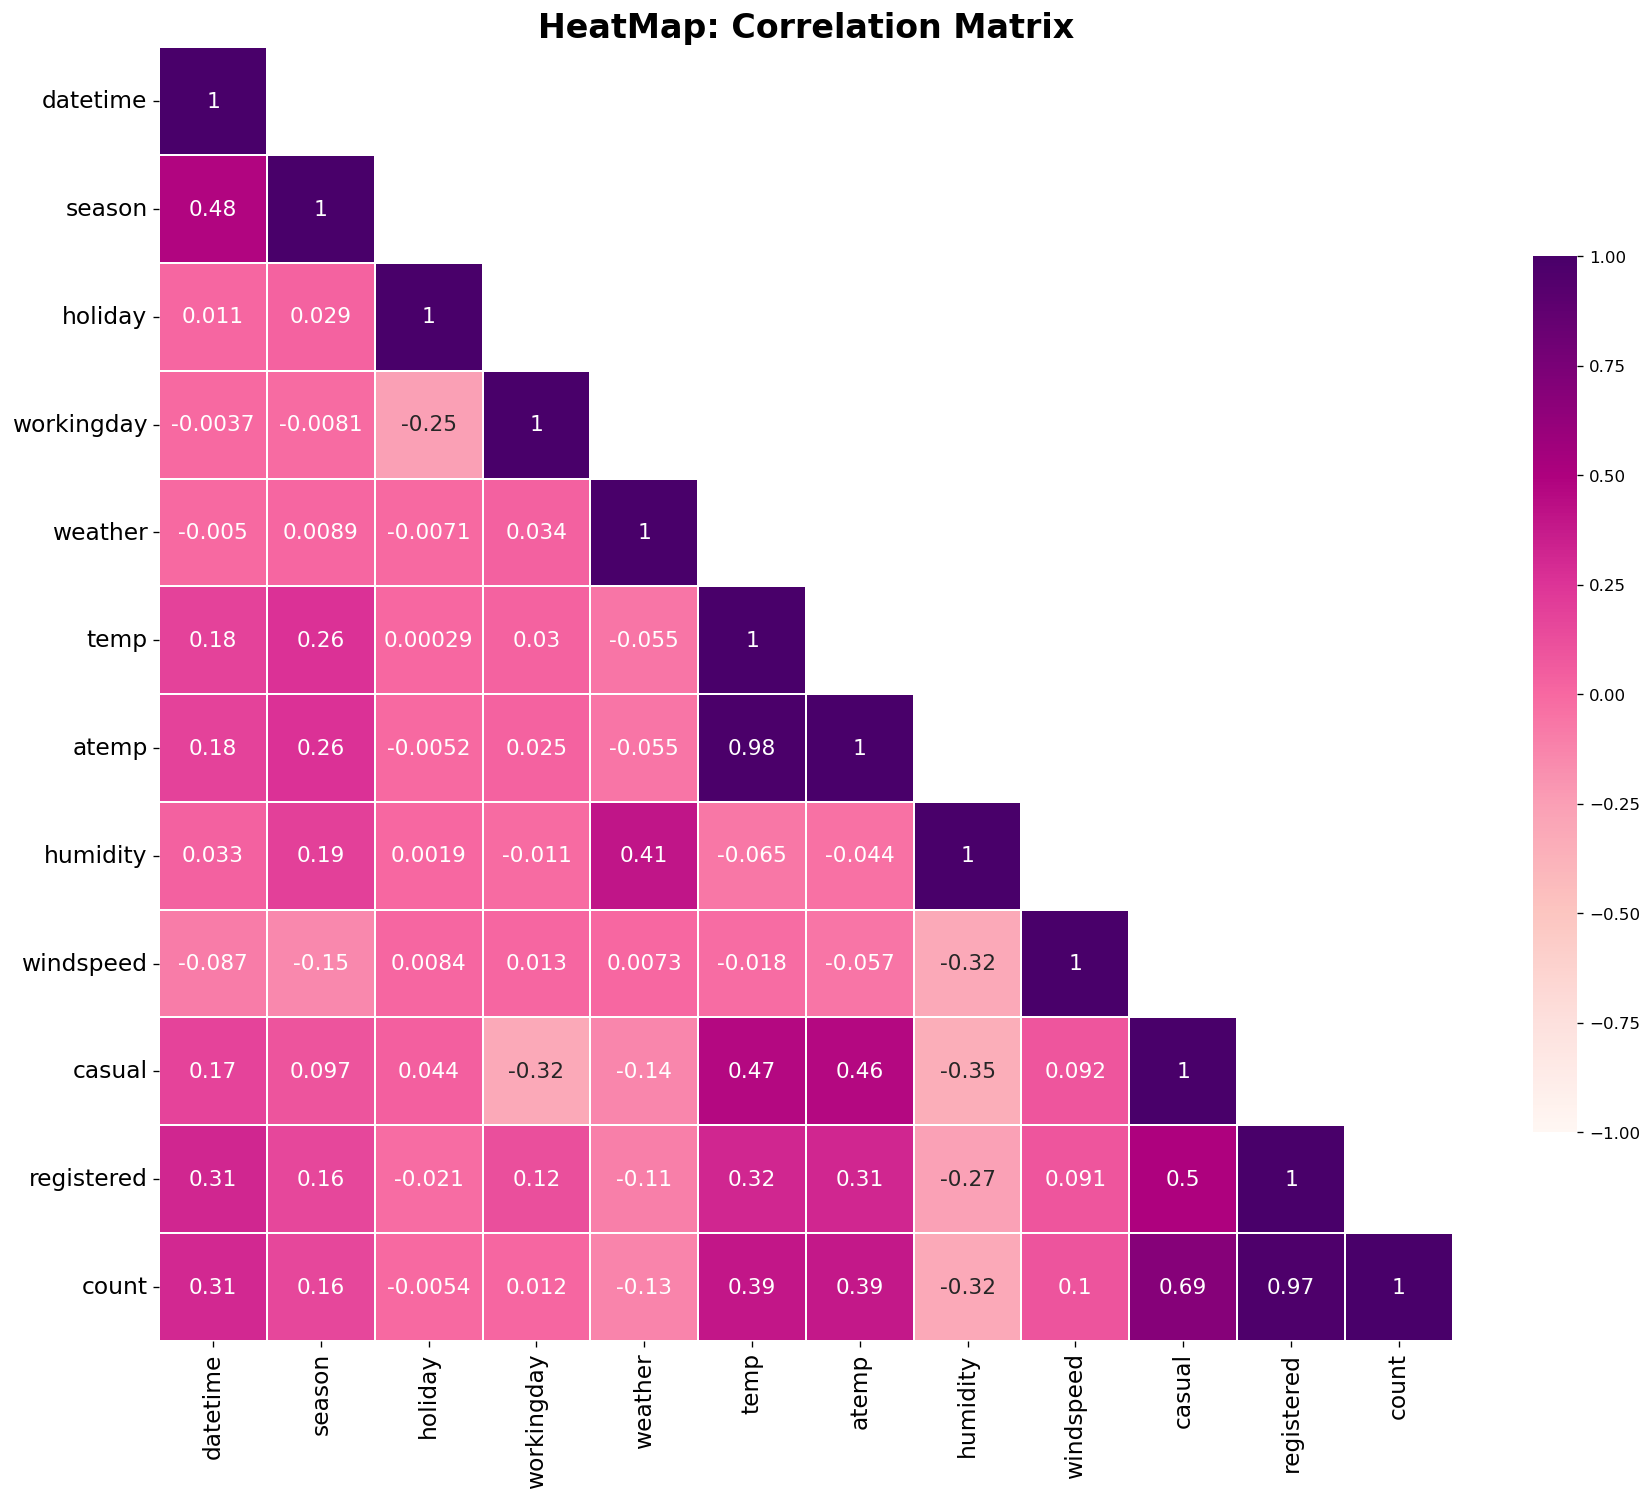

In [38]:
#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

In [39]:
# create a new feature
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [40]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [52]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [53]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [54]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
dtypes: category(2), float64(3), int32(4), int64(6)
memory usage: 957.3 KB


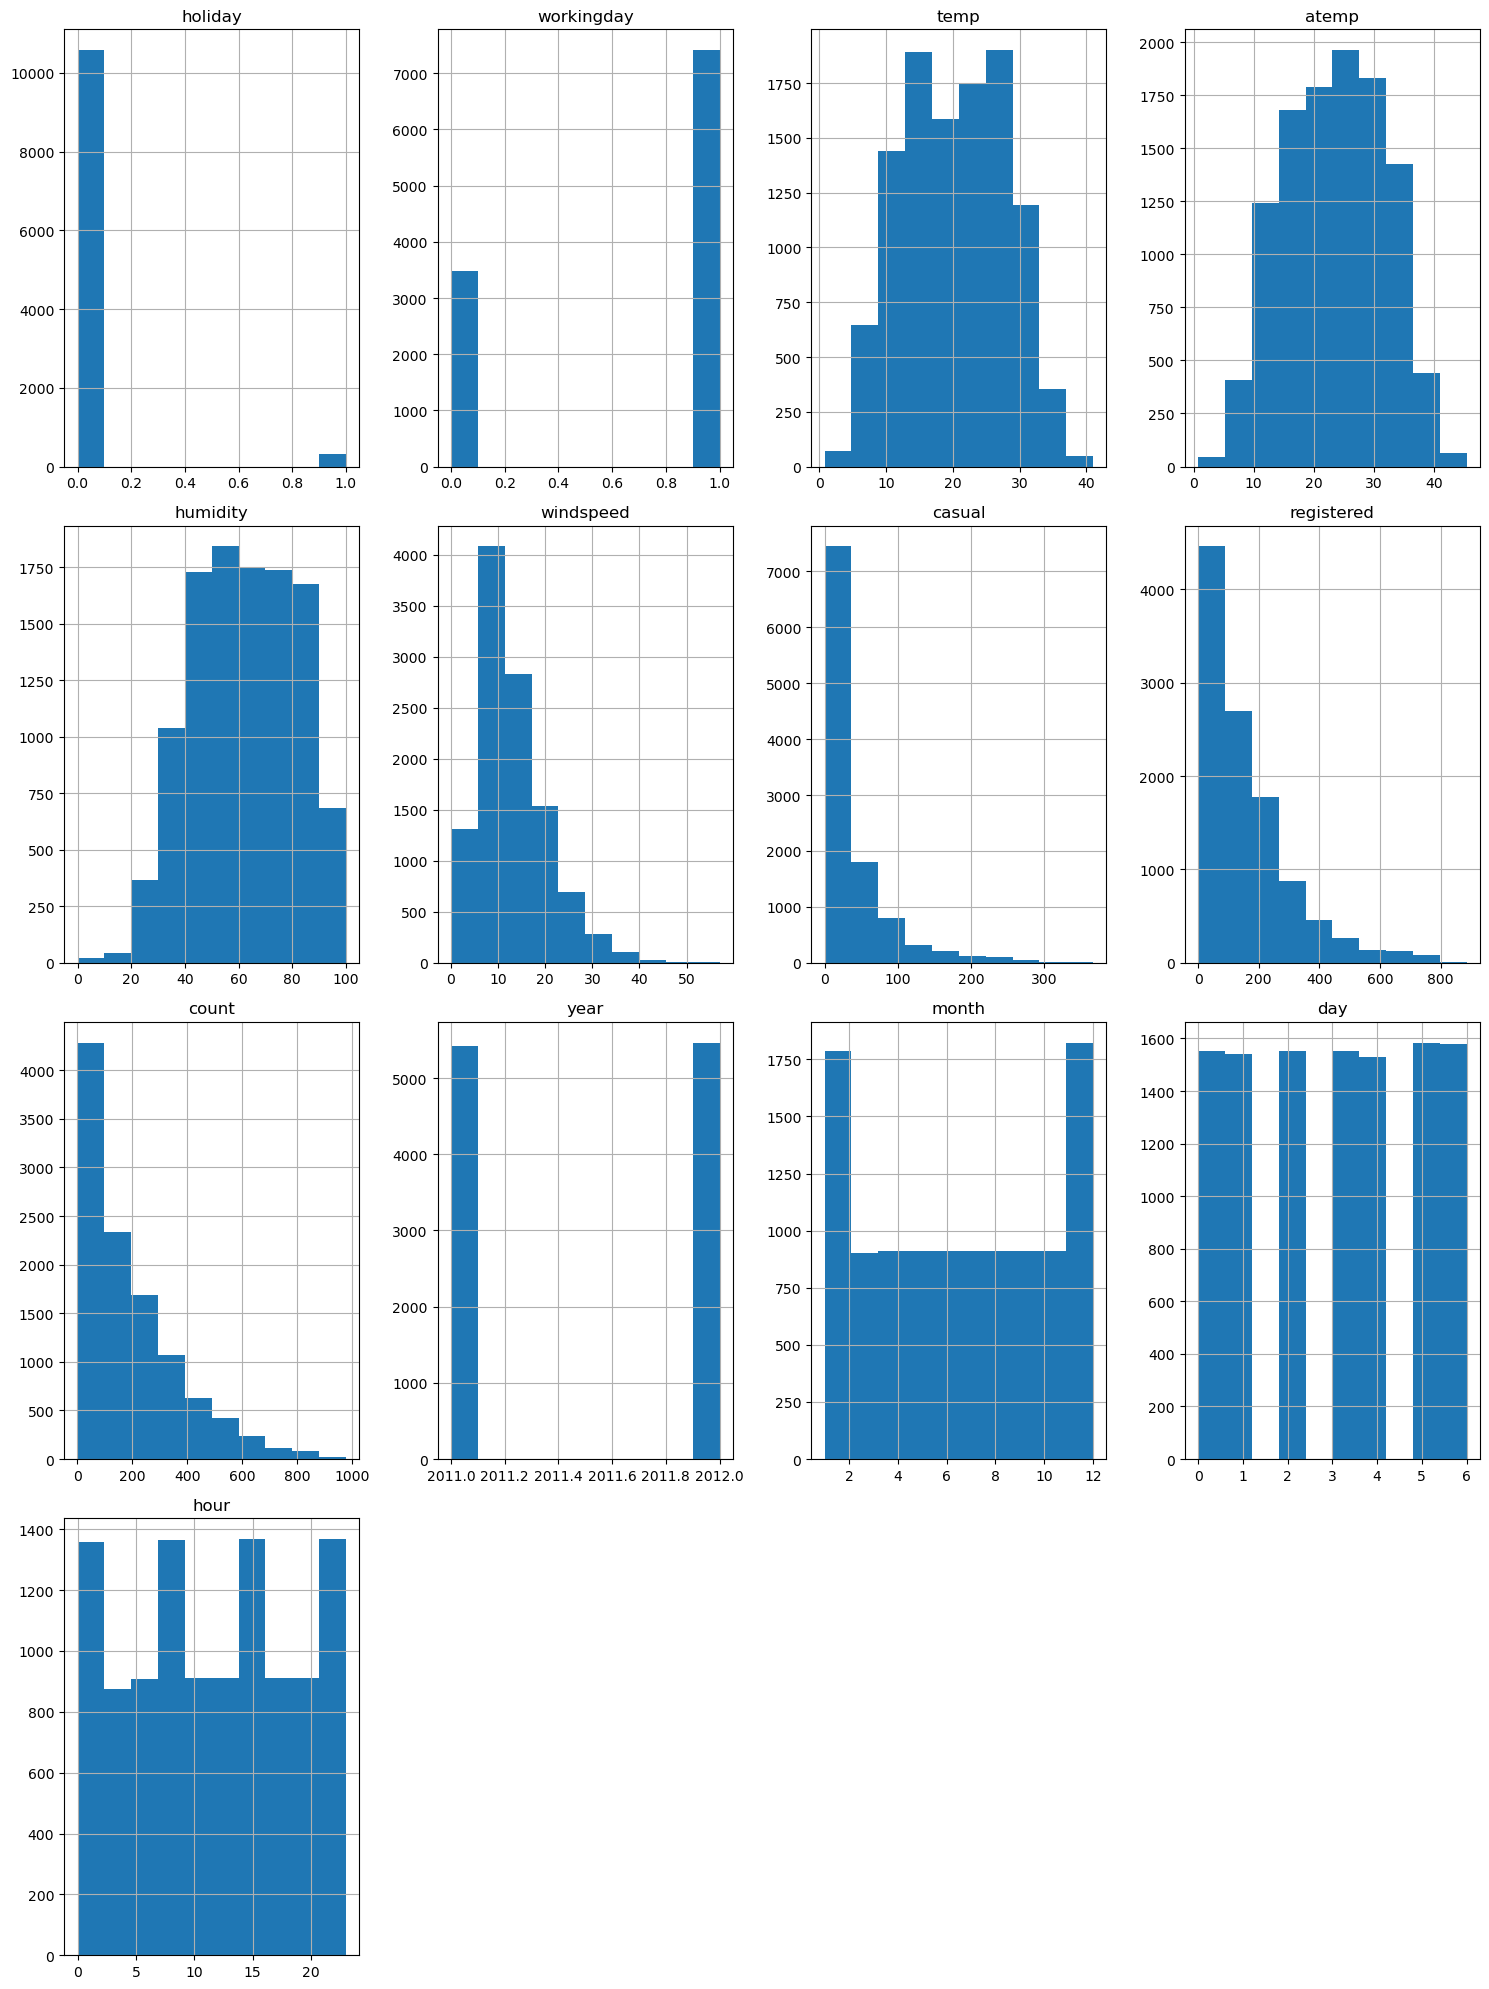

In [43]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))

plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

predictor_new_features = TabularPredictor(label=label, 
                                          problem_type= 'regression',
                                          eval_metric=eval_metric, 
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_092551"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_092551/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 184 seconds

In [50]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.007624  root_mean_squared_error      29.052661  361.532604                0.000782           0.039415            3       True         13
1      WeightedEnsemble_L2  -34.284127  root_mean_squared_error      27.298577  263.205646                0.001053           0.049163            2       True          8
2          LightGBM_BAG_L2  -34.466438  root_mean_squared_error      27.785002  292.189328                0.144160          28.894317            2       True         10
3   RandomForestMSE_BAG_L2  -34.729303  root_mean_squared_error      28.804780  306.023551                1.163938          42.728540            2       True         11
4          CatBoost_BAG_L2  -34.928715  root_mean_squared_error      27.743781  289.870331   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.587440921643605,
  'CatBoost_BAG_L1': -37.19419401046629,
  'ExtraTree

In [56]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6484
Total negative prediction values : 9


In [57]:
# Remember to set all negative values to zero 
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [58]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [60]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 688kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-05 09:55:22  new features          complete  0.46708      0.46708       
submission.csv               2024-05-05 08:41:58  first raw submission  complete  1.79985      1.79985       


#### New Score of `0.46708`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [62]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment" 

In [67]:
import autogluon.common as ag
## From autogluon documentation

nn_options = {'num_epochs': 5, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_095813"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240505_095813"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
CPU Count:          2
Memory Avail:       1.67 GB / 3.78 GB (44.1%)
Disk Space Avail:   8589934590.66 GB / 8589934592.00 GB (100.0%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1709.94 MB
	Train Data (Original)  Memory Usage: 0.69 MB (0.0% of available memo

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-77.0034	 = Validation score   (-root_mean_squared_error)
	0.75s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-44.4103	 = Validation score   (-root_mean_squared_error)
	0.91s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.005	 = Validation score   (-root_mean_squared_error)
	1.1s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-42.6588	 = Validation score   (-root_mean_squared_error)
	0.99s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-63.8359	 = Validation score   (-root_mean_squared_error)
	1.03s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-107.9925	 = Validation score   (-root_mean_squared_error)
	0.89s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-47.8059	 = Validation score   (-root_mean_squared_error)
	1.31s	 = Trainin

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.7642
[2000]	valid_set's rmse: 38.4755
[1000]	valid_set's rmse: 39.1422
[1000]	valid_set's rmse: 39.5499
[2000]	valid_set's rmse: 38.4879
[3000]	valid_set's rmse: 38.2518
[4000]	valid_set's rmse: 38.233
[5000]	valid_set's rmse: 38.1722
[6000]	valid_set's rmse: 38.1922
[1000]	valid_set's rmse: 38.4946
[1000]	valid_set's rmse: 39.0428
[2000]	valid_set's rmse: 38.4416
[3000]	valid_set's rmse: 38.3747
[4000]	valid_set's rmse: 38.3085
[5000]	valid_set's rmse: 38.3253
[1000]	valid_set's rmse: 38.3854
[2000]	valid_set's rmse: 38.0515
[1000]	valid_set's rmse: 38.7969
[2000]	valid_set's rmse: 38.0246
[1000]	valid_set's rmse: 38.7508
[2000]	valid_set's rmse: 38.4664
[1000]	valid_set's rmse: 40.6768
[2000]	valid_set's rmse: 39.6332
[3000]	valid_set's rmse: 39.3135
[4000]	valid_set's rmse: 38.8986
[5000]	valid_set's rmse: 38.7691
[6000]	valid_set's rmse: 38.7416
[7000]	valid_set's rmse: 38.7278
[8000]	valid_set's rmse: 38.6749
[9000]	valid_set's rmse: 38.6609
[1000]	vali

	Ran out of time, early stopping on iteration 6565. Best iteration is:
	[6537]	valid_set's rmse: 39.5303
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.4437	 = Validation score   (-root_mean_squared_error)
	3.69s	 = Training   runtime
	0.56s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-38.6737	 = Validation score   (-root_mean_squared_error)
	1.47s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.0593	 = Validation score   (-root_mean_squared_error)
	2.97s	 = Training   runtime
	0.54s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.162	 = Validation score   (-root_mean_squared_error)
	16.79s	 = Training   runtime
	4.55s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-38.4992	 = Validation score   (-root_mean_squared_error)
	2.34s	 = Training   runtime
	0.22s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-38.3412	 = Validation score   (-root_mean_squared_error)
	6.08s	 = Training   runtime
	0.

[1000]	valid_set's rmse: 38.5198


	-38.3822	 = Validation score   (-root_mean_squared_error)
	5.28s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 399.92s of remaining time.
	Ensemble Weights: {'LightGBM/T12': 0.391, 'LightGBM/T6': 0.348, 'LightGBM/T11': 0.261}
	-37.3346	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 200.38s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" mo

In [68]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.334582  root_mean_squared_error       3.875787  24.579705                0.000940           0.022655            2       True          4
1         LightGBM/T12 -38.007447  root_mean_squared_error       0.947634  12.015981                0.947634          12.015981            1       True          3
2         LightGBM/T11 -38.050854  root_mean_squared_error       2.295221   6.461947                2.295221           6.461947            1       True          2
3          LightGBM/T6 -38.341211  root_mean_squared_error       0.631992   6.079122                0.631992           6.079122            1       True          1
Number of models trained: 4
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer

{'model_types': {'LightGBM/T6': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T6': -38.341210542502,
  'LightGBM/T11': -38.05085373744469,
  'LightGBM/T12': -38.00744712429987,
  'WeightedEnsemble_L2': -37.33458160824363},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T6': ['LightGBM', 'T6'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'LightGBM/T12': ['LightGBM', 'T12'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T6': 6.079121828079224,
  'LightGBM/T11': 6.461947202682495,
  'LightGBM/T12': 12.015981197357178,
  'WeightedEnsemble_L2': 0.02265477180480957},
 'model_pred_times': {'LightGBM/T6': 0.6319921016693115,
  'LightGBM/T11': 2.2952213287353516,
  'LightGBM/T12': 0.947634220123291,
  'WeightedEnsemble_L2': 0.0009398460388183594},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T6': {'learni

In [70]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.334582,root_mean_squared_error,3.875787,24.579705,0.000940,0.022655,2,True,4
1,LightGBM/T12,-38.007447,root_mean_squared_error,0.947634,12.015981,0.947634,12.015981,1,True,3
2,LightGBM/T11,-38.050854,root_mean_squared_error,2.295221,6.461947,2.295221,6.461947,1,True,2
3,LightGBM/T6,-38.341211,root_mean_squared_error,0.631992,6.079122,0.631992,6.079122,1,True,1


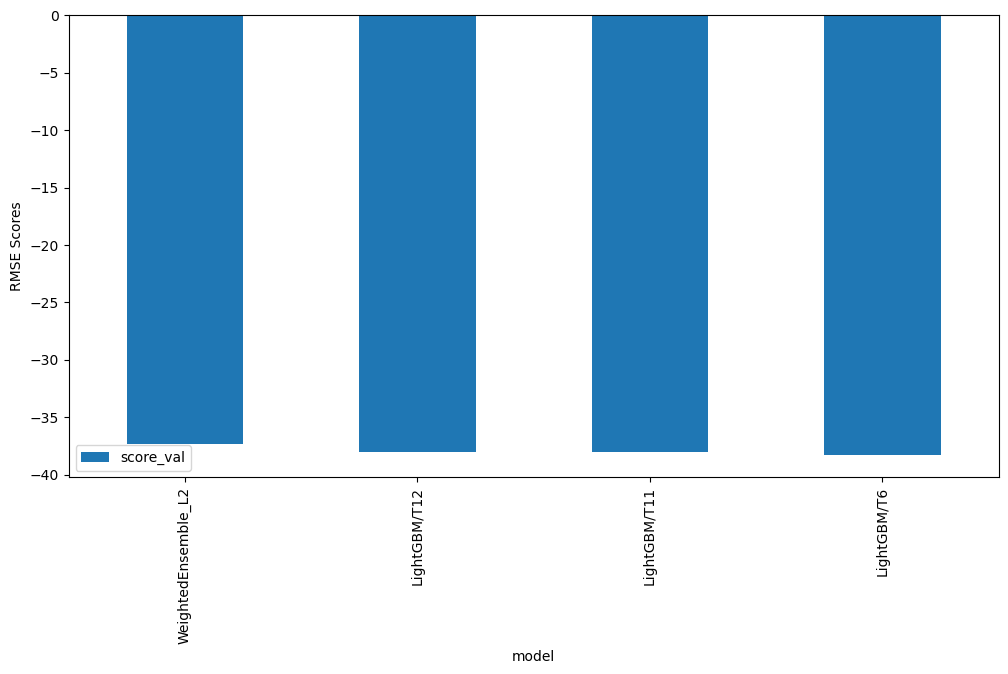

In [71]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [72]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    18.974102
1     3.479199
2     0.364897
3     0.320384
4     0.339327
Name: count, dtype: float32

In [73]:
# Rechecking the predictions in predictions_new_hpo
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6393
Total negative prediction values : 100


In [74]:
# Remember to set all negative values to zero 
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [76]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [77]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 702kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-05 10:10:08  new features with hyperparameters  complete  0.5389       0.5389        
submission_new_features.csv  2024-05-05 09:55:22  new features                       complete  0.46708      0.46708       
submission.csv               2024-05-05 08:41:58  first raw submission               complete  1.79985      1.79985       


In [ ]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

#### New Score of `0.5389`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

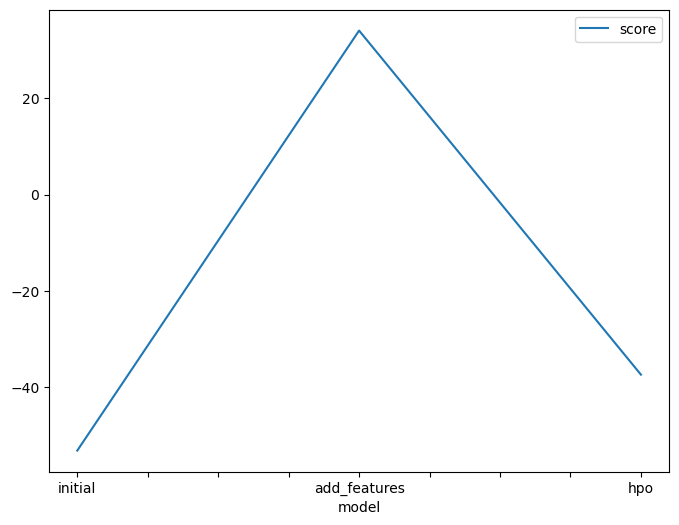

In [81]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.085967,34.007624,-37.334582]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

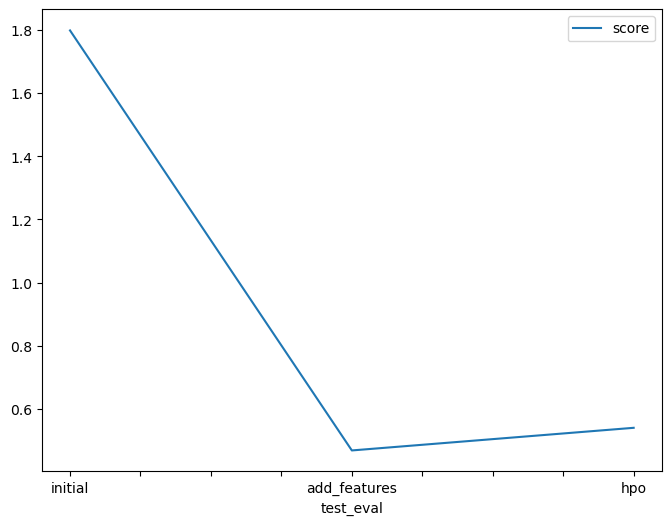

In [82]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79985,0.46708,0.5389]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [86]:
# The 3 hyperparameters we tuned with the kaggle score as the result

pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["default", "default", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["default", "default", "KNN"],
    "score": [1.79985, 0.46708, 0.5389]
})

,model,hpo1,hpo2,score
0,initial,default,default,1.79985
1,add_features,default,default,0.46708
2,hpo (top-hpo-model: hpo2),"Tree-Based Models: (GBM, XT, XGB & RF)",KNN,0.53890
